In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
UK = pd.read_csv('price_paid_records.csv', encoding = 'latin')

In [7]:
#The dataset is massive, so I've removed the sales from before 2017, 
#the London dataset is from 2018 so this also makes the sales more comparable.
UKIn2017 = UK[UK['Date of Transfer'].str.contains('2017')]
UKIn2017

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
22114250,{4C4EDFFF-6C65-1854-E050-A8C063054F34},325000,2017-02-17 00:00,T,Y,F,EASTLEIGH,EASTLEIGH,HAMPSHIRE,A,A
22114251,{4C4EDFFF-6C66-1854-E050-A8C063054F34},424950,2017-01-30 00:00,D,Y,F,FARNBOROUGH,RUSHMOOR,HAMPSHIRE,A,A
22114252,{4C4EDFFF-6C67-1854-E050-A8C063054F34},499950,2017-03-01 00:00,D,Y,F,SOUTHAMPTON,EASTLEIGH,HAMPSHIRE,A,A
22114253,{4C4EDFFF-6C68-1854-E050-A8C063054F34},410000,2017-03-06 00:00,T,N,F,FARNBOROUGH,RUSHMOOR,HAMPSHIRE,A,A
22114254,{4C4EDFFF-6C69-1854-E050-A8C063054F34},184500,2017-02-17 00:00,S,N,L,SOUTHAMPTON,SOUTHAMPTON,SOUTHAMPTON,A,A
...,...,...,...,...,...,...,...,...,...,...,...
22489343,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A
22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A
22489345,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A
22489346,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A


In [9]:
#the dataset uses 'D' for detached, meaning single family home. Using this to be comparable
UKHouse = UKIn2017[UKIn2017['Property Type'].str.contains('D')]
UKHouse

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
22114251,{4C4EDFFF-6C66-1854-E050-A8C063054F34},424950,2017-01-30 00:00,D,Y,F,FARNBOROUGH,RUSHMOOR,HAMPSHIRE,A,A
22114252,{4C4EDFFF-6C67-1854-E050-A8C063054F34},499950,2017-03-01 00:00,D,Y,F,SOUTHAMPTON,EASTLEIGH,HAMPSHIRE,A,A
22114255,{4C4EDFFF-6C6A-1854-E050-A8C063054F34},450000,2017-02-17 00:00,D,N,F,NEWBURY,BASINGSTOKE AND DEANE,HAMPSHIRE,A,A
22114256,{4C4EDFFF-6C6B-1854-E050-A8C063054F34},750000,2017-03-10 00:00,D,N,F,FAREHAM,WINCHESTER,HAMPSHIRE,A,A
22114261,{4C4EDFFF-70B9-1854-E050-A8C063054F34},530000,2017-01-09 00:00,D,N,F,HASTINGS,HASTINGS,EAST SUSSEX,A,A
...,...,...,...,...,...,...,...,...,...,...,...
22489336,{4C4EE000-2913-1854-E050-A8C063054F34},157000,2017-03-01 00:00,D,N,F,OSSETT,WAKEFIELD,WEST YORKSHIRE,A,A
22489338,{4C4EE000-2915-1854-E050-A8C063054F34},190000,2017-02-28 00:00,D,N,F,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A
22489340,{4C4EE000-2917-1854-E050-A8C063054F34},175000,2017-03-22 00:00,D,N,F,HEBDEN BRIDGE,CALDERDALE,WEST YORKSHIRE,A,A
22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A


In [51]:
UKCounty = UKHouse[UKHouse['County'].str.contains ('|'.join(['WEST MIDLANDS', 'GREATER MANCHESTER', 'WEST YORKSHIRE', 'HAMPSHIRE', 'KENT']))]

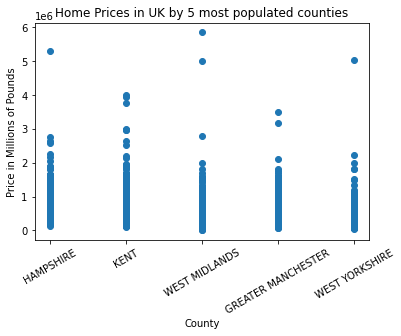

In [48]:
plt.scatter(UKCounty['County'], UKCounty['Price'])
plt.title('Home Prices in UK by 5 most populated counties')
plt.xticks(rotation = 30)
plt.xlabel('County')
plt.ylabel('Price in Millions of Pounds')
plt.show()

In [49]:
UKFlat = UKIn2017[UKIn2017['Property Type'].str.contains('F')]
UKFlat

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
22114291,{4C4EDFFF-6E29-1854-E050-A8C063054F34},98000,2017-03-10 00:00,F,N,F,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A
22114321,{4C4EDFFF-68E0-1854-E050-A8C063054F34},150000,2017-02-17 00:00,F,N,L,SOUTHAMPTON,SOUTHAMPTON,SOUTHAMPTON,A,A
22114327,{4C4EDFFF-68E6-1854-E050-A8C063054F34},174995,2017-02-24 00:00,F,N,L,SOUTHAMPTON,SOUTHAMPTON,SOUTHAMPTON,B,A
22114329,{4C4EDFFF-68EA-1854-E050-A8C063054F34},180000,2017-03-06 00:00,F,N,L,SOUTHAMPTON,SOUTHAMPTON,SOUTHAMPTON,B,A
22114331,{4C4EDFFF-68EC-1854-E050-A8C063054F34},159000,2017-03-08 00:00,F,N,L,GOSPORT,GOSPORT,HAMPSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...
22489298,{4C4EE000-26E4-1854-E050-A8C063054F34},141064,2017-02-22 00:00,F,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A
22489302,{4C4EE000-26E8-1854-E050-A8C063054F34},112500,2017-02-28 00:00,F,N,L,LEEDS,LEEDS,WEST YORKSHIRE,A,A
22489314,{4C4EE000-26F4-1854-E050-A8C063054F34},190000,2017-03-09 00:00,F,N,L,WETHERBY,LEEDS,WEST YORKSHIRE,A,A
22489319,{4C4EE000-2901-1854-E050-A8C063054F34},130000,2017-03-24 00:00,F,N,L,LEEDS,LEEDS,WEST YORKSHIRE,A,A


In [52]:
UKFlatCounty = UKFlat[UKFlat['County'].str.contains ('|'.join(['WEST MIDLANDS', 'GREATER MANCHESTER', 'WEST YORKSHIRE', 'HAMPSHIRE', 'KENT']))]

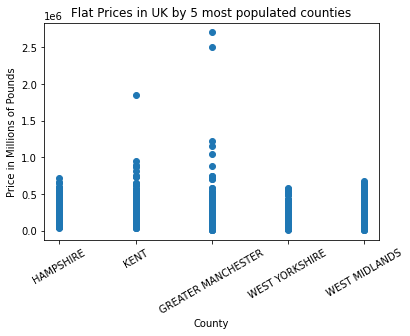

In [53]:
plt.scatter(UKFlatCounty['County'], UKFlatCounty['Price'])
plt.title('Flat Prices in UK by 5 most populated counties')
plt.xticks(rotation = 30)
plt.xlabel('County')
plt.ylabel('Price in Millions of Pounds')
plt.show()

In [56]:
avgPrice = UKIn2017['Price'].mean()
print ("The average home Price in The UK is: £" ,int(avgPrice))

The average home Price in The UK is: £ 328828
